In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\train\\clear_road", delete=True, max_size=500)
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\train\\dirt_road", delete=True, max_size=500)
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\train\\snowy_road", delete=True, max_size=500)
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\train\\wet_road", delete=True, max_size=500)

verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\valid\\clear_road", delete=True, max_size=500)
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\valid\\dirt_road", delete=True, max_size=500)
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\valid\\snowy_road", delete=True, max_size=500)
verify_images("C:\\Users\\sadi\\PotentialMotors\\data\\images\\valid\\wet_road", delete=True, max_size=500)


In [6]:
path = "C:\\Users\\sadi\\PotentialMotors\\data\\images"
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=2, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['clear_road', 'dirt_road', 'snowy_road', 'wet_road']

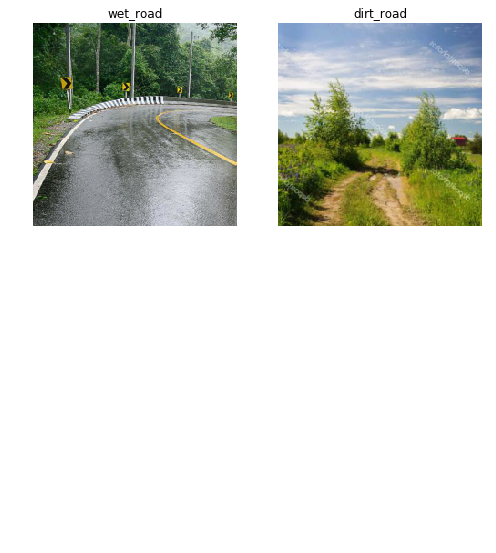

In [12]:
data.show_batch(rows=4, figsize=(7, 8))

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.fit_one_cycle(4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


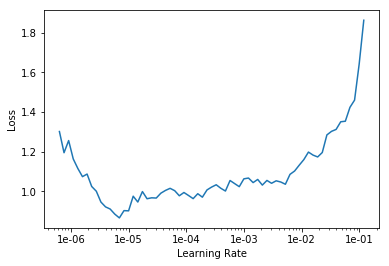

In [17]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(4, max_lr=slice(1e-048, 1e-051))

In [19]:
learn.save('road_classification_model_v1')

In [20]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

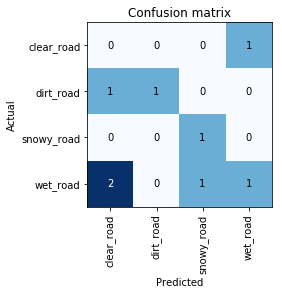

In [23]:
interp.plot_confusion_matrix()

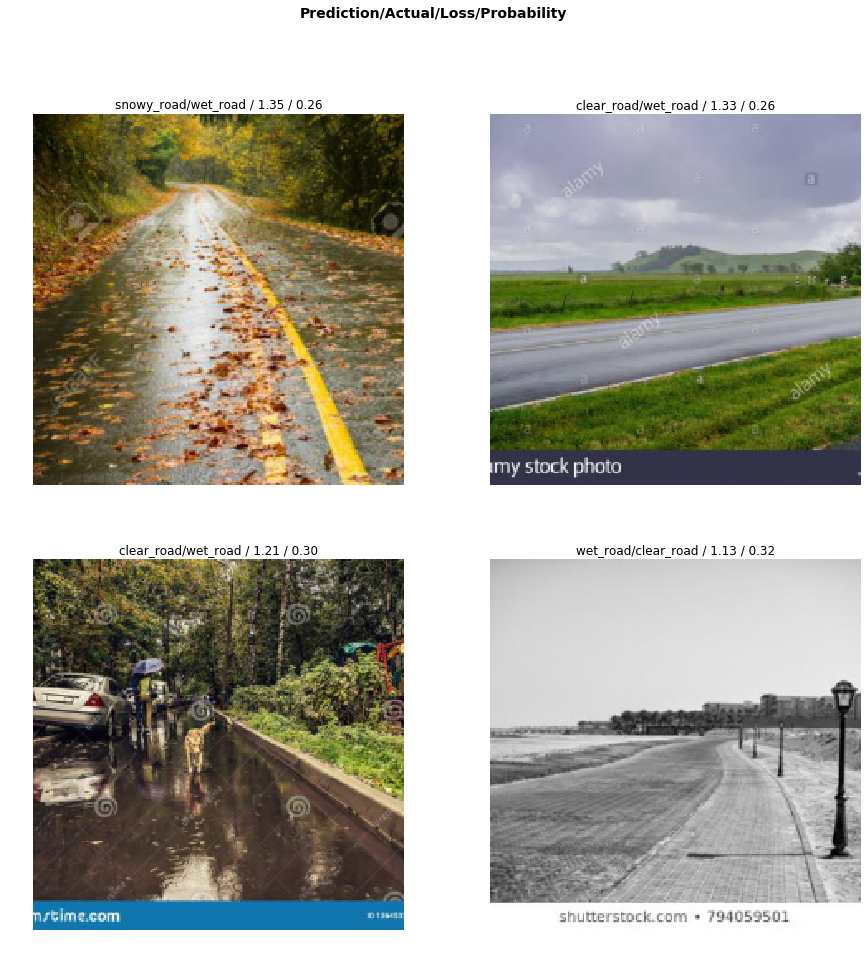

In [27]:
interp.plot_top_losses(4, figsize=(15,15))

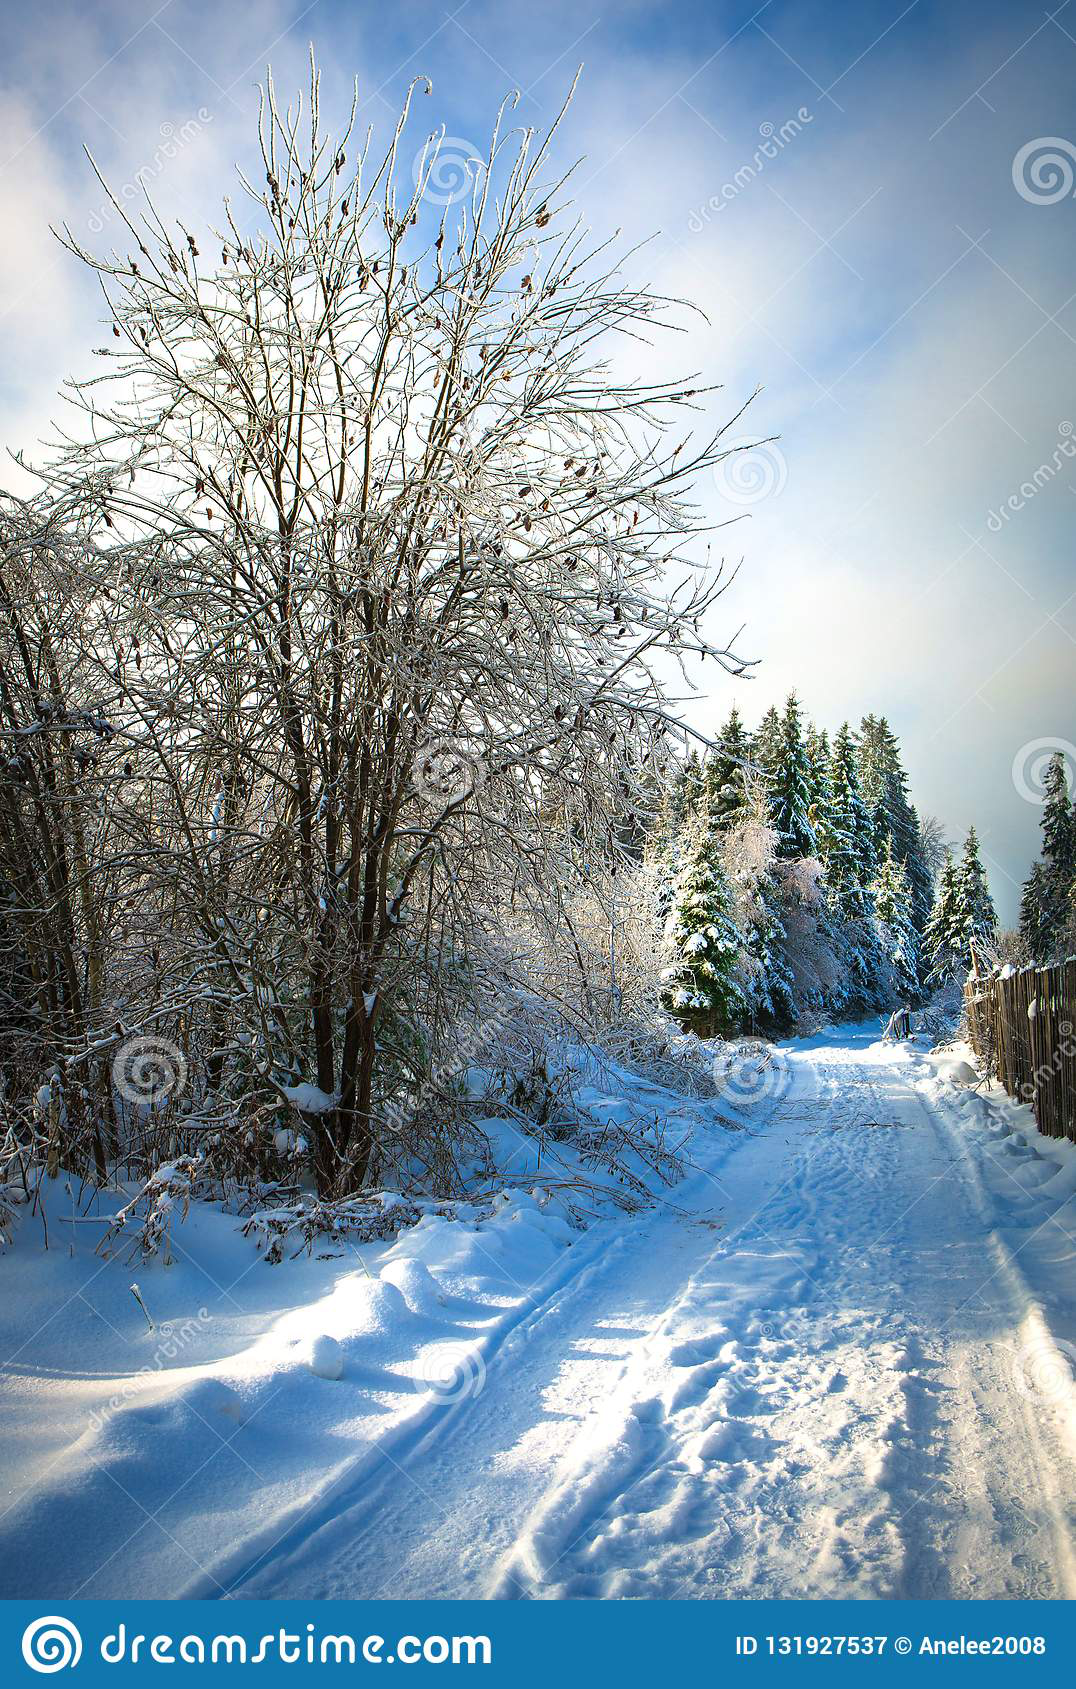

In [65]:
img = open_image("C:\\Users\\sadi\\PotentialMotors\\data\\snow covered road day\\3.beautiful-winter-landscape-snow-covered-road-frosty-day-sunny-icy-tree-branches-green-spruce-background-rural-131927537.jpg")
img

In [66]:
learn.predict(img)[0]

Category snowy_road